In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
#https://github.com/mwv/zca
from zca.zca import zca
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [17]:
class ss_yj_Transformer(BaseEstimator, TransformerMixin):
    # add another additional parameter, just for fun, while we are at it
    
    def __init__(self, feature_names=[], additional_param = ""):  
        self.ss_X = StandardScaler()
        self.pt_X = PowerTransformer(standardize=True)
        self.zca_X = zca.ZCA()
        self.ss_y = StandardScaler()
        self.pt_y = PowerTransformer(standardize=True)  
        self.zca_y = zca.ZCA()
        self.feature_names = feature_names
        self.additional_param = additional_param
        self.medians = pd.DataFrame()
        self.mads = []
        self.mad_transformed = pd.DataFrame()

    def fit(self, X, y = None):
        self.ss_X.fit(X)
        self.medians = X.median()
        self.mads = pd.DataFrame(scipy.stats.median_abs_deviation(X,scale='normal'),index=X.columns).T#scipy.stats.median_abs_deviation(X)
        #self.pt_X.fit(self.ss_X.transform(X))
        self.mad_transformed = ((X-X.median())/scipy.stats.median_abs_deviation(X,scale='normal'))
        self.pt_X.fit(self.mad_transformed)        
        self.zca_X.fit(self.pt_X.transform(self.ss_X.transform(X)))
        if (y is not None):
            self.ss_y.fit(y)
            self.pt_y.fit(self.ss_y.transform(y))
            self.zca_y.fit(self.pt_y.transform(self.ss_y.transform(y)))
        return self

    def transform(self, X, y = None):
        #pt_X_ = pd.DataFrame(self.zca_X.fit_transform(self.pt_X.fit_transform(self.ss_X.fit_transform(X))),columns=X.columns,index=X.index)
        #pt_X_ = pd.DataFrame(self.zca_X.fit_transform(self.pt_X.fit_transform(self.mad_transformed)),columns=X.columns,index=X.index)
        pt_X_ = pd.DataFrame(self.zca_X.fit_transform(self.pt_X.fit_transform(self.mad_transformed)),columns=X.columns)
        if (y is None):
            return pt_X_
        else:
            pt_y_ = pd.DataFrame(self.zca_y.fit_transform(self.pt_y.fit_transform(self.ss_y.fit_transform(X))),columns=Y.columns,index=Y.index)
            return pt_X_, pt_y_
        
    def inverse_transform(self, X, y = None):
        #target_X = pd.DataFrame(self.ss_X.inverse_transform(self.pt_X.inverse_transform(self.zca_X.inverse_transform(X))),index=X.index,columns=X.columns)
        target_X = pd.DataFrame((self.pt_X.inverse_transform(self.zca_X.inverse_transform(X))),columns=X.columns)*np.array(self.mads)+np.array(self.medians)
        if (y is None):
            return target_X
        else:
            target_y = pd.DataFrame(self.ss_Xy.inverse_transform(self.pt_y.inverse_transform(self.zca_y.inverse_transform(y))),index=y.index,columns=y.columns)
            return target_X, target_y
        

In [18]:
exclude = 'States'

In [19]:
all_data = pd.read_csv('../data/raw/states.csv')

X = all_data[set(all_data.columns).difference([exclude])].copy()

In [20]:
scaler = ss_yj_Transformer()
scaler.fit(X)
X_ = scaler.transform(X)

In [21]:
scaler.inverse_transform(X_)

,Crime,Poverty,University,Unemployed,Traf Deaths,White,Doctors,Income,Infant Mort,Population
0,448.0,15.7,22.0,5.0,1.81,71.0,218.2,42666.0,9.0,4634063.0
1,661.0,8.4,27.3,6.7,1.63,70.6,228.5,68460.0,6.9,679893.0
2,483.0,14.7,25.1,5.5,1.69,86.5,209.7,50958.0,6.4,6360238.0
3,529.0,17.3,18.8,5.1,1.96,80.8,203.4,38815.0,8.5,2841595.0
4,523.0,13.3,29.6,7.2,1.21,76.6,268.7,61021.0,5.0,36185908.0
5,348.0,11.4,35.6,4.9,1.14,89.7,259.7,56993.0,5.7,4837229.0
6,256.0,9.3,35.6,5.7,0.86,84.3,376.4,68595.0,6.2,3488084.0
7,689.0,10.0,27.5,4.8,1.23,74.3,250.9,57989.0,8.3,865314.0
8,723.0,13.2,25.8,6.2,1.56,79.8,247.9,47778.0,7.3,18262096.0
9,493.0,14.7,27.5,6.2,1.46,65.4,217.4,50861.0,8.1,9526642.0


In [22]:
X.shape

(50, 10)

array([[<AxesSubplot:title={'center':'Crime'}>,
        <AxesSubplot:title={'center':'Poverty'}>,
        <AxesSubplot:title={'center':'University'}>],
       [<AxesSubplot:title={'center':'Unemployed'}>,
        <AxesSubplot:title={'center':'Traf Deaths'}>,
        <AxesSubplot:title={'center':'White'}>],
       [<AxesSubplot:title={'center':'Doctors'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Infant Mort'}>],
       [<AxesSubplot:title={'center':'Population'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

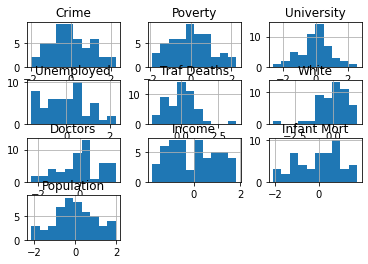

In [23]:
X_.hist()

In [24]:
random_ = pd.DataFrame(np.random.normal(0, 1, [1000,len(X.columns)]),columns=X.columns)

array([[<AxesSubplot:title={'center':'Crime'}>,
        <AxesSubplot:title={'center':'Poverty'}>,
        <AxesSubplot:title={'center':'University'}>],
       [<AxesSubplot:title={'center':'Unemployed'}>,
        <AxesSubplot:title={'center':'Traf Deaths'}>,
        <AxesSubplot:title={'center':'White'}>],
       [<AxesSubplot:title={'center':'Doctors'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Infant Mort'}>],
       [<AxesSubplot:title={'center':'Population'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

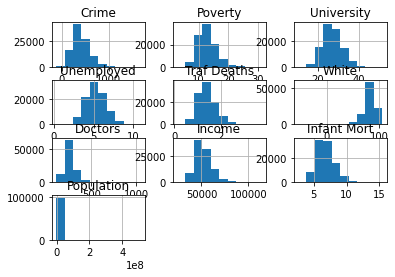

In [25]:
scaler.inverse_transform(random_).hist()

In [26]:
X.describe()

,Crime,Poverty,University,Unemployed,Traf Deaths,White,Doctors,Income,Infant Mort,Population
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000,5.000000e+01
mean,407.480000,12.732000,26.940000,5.270000,1.40440,81.96200,260.276000,51985.100000,6.830000,6.016154e+06
std,183.633868,2.939002,4.761152,1.253933,0.38654,11.97458,64.363415,8592.657934,1.338786,6.663772e+06
min,118.000000,7.600000,17.100000,3.000000,0.76000,29.70000,168.800000,37790.000000,4.700000,5.232260e+05
25%,278.250000,10.450000,24.025000,4.400000,1.14000,76.15000,218.425000,46161.250000,5.725000,1.779632e+06
50%,345.500000,12.400000,26.200000,5.300000,1.37500,84.55000,249.050000,50173.000000,6.850000,4.313980e+06
75%,520.000000,14.700000,29.825000,6.275000,1.62000,89.85000,274.800000,56903.000000,7.750000,6.490796e+06
max,788.000000,21.200000,38.100000,8.400000,2.45000,96.40000,469.000000,70545.000000,10.600000,3.618591e+07


In [27]:
scaler.inverse_transform(random_).describe()

,Crime,Poverty,University,Unemployed,Traf Deaths,White,Doctors,Income,Infant Mort,Population
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,407.310694,12.728766,26.948231,5.275745,1.404488,81.941966,260.552385,52011.711003,6.831246,6.226968e+06
std,186.467940,2.946386,4.763326,1.257965,0.388493,11.982008,64.762219,8690.593685,1.348057,9.260404e+06
min,-122.766374,2.651376,10.111850,0.277233,0.110564,-55.461833,104.137356,23848.709828,2.618937,-2.985983e+06
25%,275.255801,10.658310,23.605235,4.412984,1.132530,77.147505,216.687648,45875.028454,5.890056,2.190686e+06
50%,380.345564,12.426949,26.630757,5.230845,1.359153,84.775812,246.301527,50788.567118,6.668354,3.941792e+06
75%,512.802757,14.513685,29.991783,6.094050,1.633702,89.825949,289.479713,56908.778097,7.615574,7.121325e+06
max,1685.313169,31.309348,51.667767,10.919722,3.758782,106.567688,1050.173675,113942.019106,15.443589,5.119165e+08


In [28]:
kde = KernelDensity(bandwidth=.2, kernel='gaussian')
kde.fit(X.iloc[:,[0]])



KernelDensity(bandwidth=0.2)

In [29]:
logprobX = kde.score_samples(X.iloc[:,[0]])
np.sum(np.exp(kde.score_samples(X.iloc[:,[0]])))


2.3138661183600187